In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
import cv2
label_path = "C:/Users/zafer/OneDrive/Desktop/Brain Tumor labeled dataset/labels/Tr-gl_0021.txt"
image_path = "C:/Users/zafer/OneDrive/Desktop/Brain Tumor labeled dataset/images/Tr-gl_0021.jpg"
image = cv2.imread(image_path)
data = pd.read_csv(label_path)
contors =data.columns[0].split(' ')

In [3]:
contors

['2', '0.633789', '0.401367', '0.173828', '0.197266']

In [6]:
# Given normalized coordinates
center_x_normalized = 0.633789
center_y_normalized = 0.401367
width_normalized = 0.173828
height_normalized = 0.197266

# Given image dimensions
image_width = 512
image_height = 512

# Unnormalize YOLO labels
center_x_unnormalized = int(center_x_normalized * image_width)
center_y_unnormalized = int(center_y_normalized * image_height)
width_unnormalized = int(width_normalized * image_width)
height_unnormalized = int(height_normalized * image_height)

# Print unnormalized coordinates
print("Unnormalized Coordinates:")
print("center_x_unnormalized:", center_x_unnormalized)
print("center_y_unnormalized:", center_y_unnormalized)
print("width_unnormalized:", width_unnormalized)
print("height_unnormalized:", height_unnormalized)

# Normalize YOLO labels again based on a new image size if needed
new_image_width = 512
new_image_height = 512

center_x_normalized_again = center_x_unnormalized / new_image_width
center_y_normalized_again = center_y_unnormalized / new_image_height
width_normalized_again = width_unnormalized / new_image_width
height_normalized_again = height_unnormalized / new_image_height


# Print normalized coordinates again
print("\nNormalized Coordinates Again:")
print("center_x_normalized_again:", center_x_normalized_again)
print("center_y_normalized_again:", center_y_normalized_again)
print("width_normalized_again:", width_normalized_again)
print("height_normalized_again:", height_normalized_again)


x1 = center_x_unnormalized - width_unnormalized // 2
y1 = center_y_unnormalized - height_unnormalized // 2
x2 = center_x_unnormalized + width_unnormalized // 2
y2 = center_y_unnormalized + height_unnormalized // 2

print("\ncropping values")
print("x1:", x1)
print("y1:", y1)
print("x2:", x2)
print("y2:", y2)

Unnormalized Coordinates:
center_x_unnormalized: 324
center_y_unnormalized: 205
width_unnormalized: 88
height_unnormalized: 101

Normalized Coordinates Again:
center_x_normalized_again: 0.6328125
center_y_normalized_again: 0.400390625
width_normalized_again: 0.171875
height_normalized_again: 0.197265625

cropping values
x1: 280
y1: 155
x2: 368
y2: 255


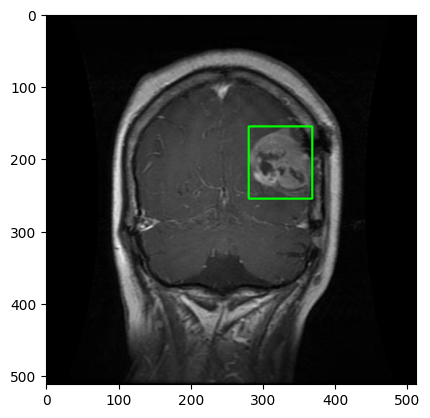

In [50]:
cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(image)

(512, 512, 3)
(465, 330, 3)


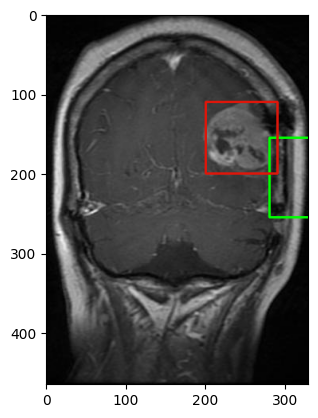

In [102]:
from a import crop_img
cr = crop_img(image_path)
cv2.rectangle(cr, (x1, y1), (x2, y2), (0, 255, 0), 2)
cv2.rectangle(cr, (200, 110), (290, 200), (223, 22, 10), 2)

print(image.shape)
print(cr.shape)
plt.imshow(cr)

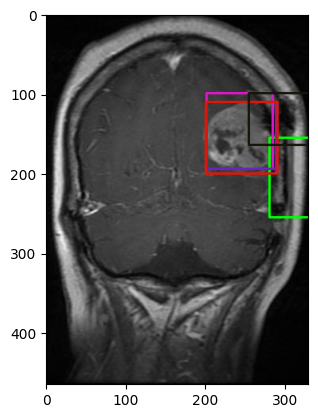

In [101]:
cv2.rectangle(cr, (254, 99), (334, 164), (22, 22, 10), 2)
plt.imshow(cr)

In [ ]:
cv2.rectangle(cr, (200, 110), (290, 200), (223, 22, 10), 2)


In [ ]:
(200, 110,290, 200)

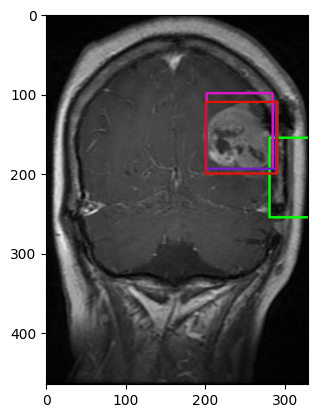

In [99]:
cv2.rectangle(cr, (200, 110), (290, 200), (223, 22, 10), 2)
plt.imshow(cr)

In [ ]:
(200, 110,290, 200)

In [94]:
def adjust_bbox_after_crop(x1, y1, x2, y2, original_size, cropped_size):
    # Extracting original and cropped image dimensions
    original_width, original_height, _ = original_size
    cropped_width, cropped_height, _ = cropped_size
    
    # Calculate aspect ratios
    aspect_ratio_x = cropped_width / original_width
    aspect_ratio_y = cropped_height / original_height
    
    # Adjust bounding box coordinates
    adjusted_x1 = int(x1 * aspect_ratio_x)-53
    adjusted_y1 = int(y1 * aspect_ratio_y)+11
    adjusted_x2 = int(x2 * aspect_ratio_x)-46
    adjusted_y2 = int(y2 * aspect_ratio_y)+40
    
    return adjusted_x1, adjusted_y1, adjusted_x2, adjusted_y2

# Example usage:
original_bbox = (280, 155, 368, 255)
original_size = (512, 512, 3)
cropped_size = (465, 330, 3)

adjusted_bbox = adjust_bbox_after_crop(*original_bbox, original_size, cropped_size)
print("Adjusted Bounding Box:", adjusted_bbox)


Adjusted Bounding Box: (201, 110, 288, 204)


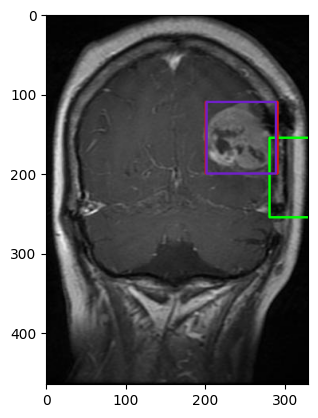

In [103]:

cv2.rectangle(cr, (201, 110), (288, 200), (112, 32, 200), 2)
plt.imshow(cr)

In [ ]:
(200, 110,290, 200)

In [ ]:
(200, 110,290, 200)